### Student Information
Name:藍裕捷

Student ID:104061202

GitHub ID:eugene08976

Kaggle name:Eugene Lan

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

## First Part

---

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [11]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [12]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [13]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [14]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [15]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


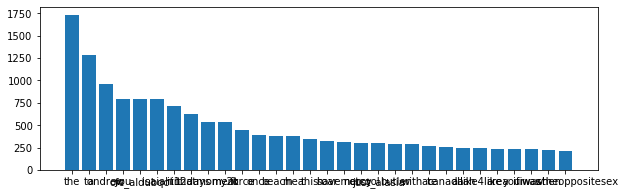

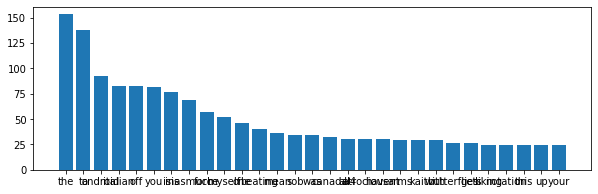

In [19]:
# Answer here
train_vectorizer = CountVectorizer()
test_vectorizer = CountVectorizer()

train_tf = train_vectorizer.fit_transform(train_df.text)
test_tf = test_vectorizer.fit_transform(test_df.text)

train_tf_sum = train_tf.toarray().sum(axis=0)
test_tf_sum = test_tf.toarray().sum(axis=0)

N = 30
def plot_top_N(target,vec):
    tmp = target
    name = vec.get_feature_names()
    
    count = []
    word = []
    
    for i in range(N):
        count.append(tmp[np.argmax(tmp)])
        word.append(name[np.argmax(tmp)])
        
        tmp = np.delete(tmp,obj=np.argmax(tmp))
        name = np.delete(name,obj=np.argmax(tmp))
    
    plt.figure(figsize=(10,3))
    plt.bar(word,count)
    plt.show()
    #return word,count

plot_top_N(train_tf_sum,train_vectorizer)
plot_top_N(test_tf_sum,test_vectorizer)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Setup embedding
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
vectorizer_count = tfidf_vectorizer.fit_transform(train_df['text'])

print(f"The feature names for [100:110] are: \n\n{tfidf_vectorizer.get_feature_names()[100:110]}")

The feature names for [100:110] are: 

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'joy', 'fear', 'joy', 'fear', 'sadness', 'joy',
       'sadness', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

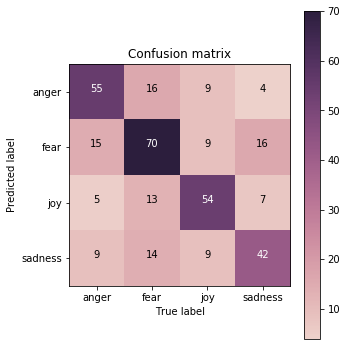

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The result means that

1.The model can predict fear data most correctly.

2.Sadness data is predicted incorrectly as fear the most.

3.Anger data is predicted incorrectly as fear the most.

4.Joy and Anger is less likely to be confused.

The confusion matrix can tell us if the model predict the emotion correctly, if not we can know which data perform the worst and which data does it incorrectly predict to. The diagonal line is the amount of the data which are correctly predicted thus if the we have a strong diagonal line means the model's results are good.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

cv1 = TfidfVectorizer(min_df=1, stop_words='english')

train_text = train_df['text']
train_emotion = train_df['emotion']

test_text = test_df['text']
test_emotion = test_df['emotion']

# learn training data vocab and create a document-term matrix
x_traincv=cv1.fit_transform(train_text)

# Transform the testing data into a document-term matrix
x_testcv=cv1.transform(test_text)

# Train the model and time it
%time mnb.fit(x_traincv, train_emotion)

CPU times: user 9.16 ms, sys: 240 µs, total: 9.4 ms
Wall time: 9.46 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# Predict for test count vectozer
prediction = mnb.predict(x_testcv)

In [34]:
# Calculate accuraccy
tf_idf_acc = metrics.accuracy_score(test_emotion, prediction)
tf_idf_acc

0.7780979827089337

In [35]:
# The difference between the training and the testing prediction.
train_prediction = mnb.predict(x_traincv)

acc_train = accuracy_score(y_true=train_emotion, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=test_emotion, y_pred=prediction)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.78


In [36]:
print(classification_report(y_true=test_emotion, y_pred=prediction))

              precision    recall  f1-score   support

       anger       0.86      0.70      0.77        84
        fear       0.66      0.91      0.77       110
         joy       0.88      0.77      0.82        79
     sadness       0.86      0.68      0.76        74

    accuracy                           0.78       347
   macro avg       0.82      0.76      0.78       347
weighted avg       0.80      0.78      0.78       347



### The testing results is that accuracy of our model is 0.78.

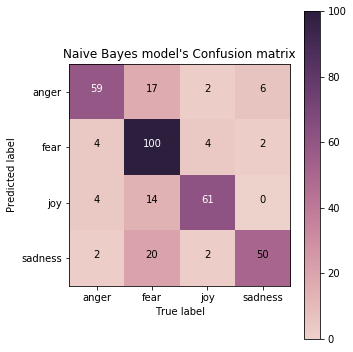

In [37]:
naive_confusion_matrix = confusion_matrix(y_true=test_emotion, y_pred=prediction) 

my_tags = ['anger', 'fear', 'joy', 'sadness']

plot_confusion_matrix(naive_confusion_matrix, classes=my_tags, title="Naive Bayes model's Confusion matrix")

### we can see form the confusion matrix above. The fear data precidicted 100 correctly out of 151 which apparently the most incorrectly predicted data among four categories.

---
### ** >>> Exercise 5 (Take home): **  
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Exercise 5 answer
The result from the Naive Bayes model is 78% accuracy and the Decision tree model is 64% accuracy which is a really significant difference between two models.

With the theoretical background covered in class, I think the decision tree model is overfitting since we can see from the testing accuracy that it is 99%. The reason causing overfit might due to we need to do more preprocessing or do tree-pruning and tree-tuning to improve the accuracy. Besides training with a maximun of 500 features may not be enough to make decision tree perform well. We can see that from the confusion matrix that the model classified and missclassified fear the most at the same time.


Naive bayes model performs a lot better on 'fear'. The reason for this could be that it learns the prior probabilities for each class while the Decision tree makes no assumptions on distribution of data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

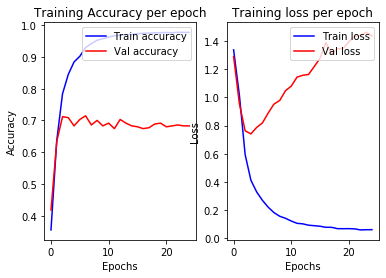

In [47]:
training_log.epoch
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.title('Training Accuracy per epoch')
plt.plot(training_log.epoch,training_log.accuracy,color = 'b',label='Train accuracy')
plt.plot(training_log.epoch,training_log.val_accuracy,color = 'r',label='Val accuracy')
plt.legend(loc='upper right')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(122)
plt.title('Training loss per epoch')
plt.plot(training_log.epoch,training_log.loss,color = 'b',label = 'Train loss')
plt.plot(training_log.epoch,training_log.val_loss,color = 'r',label = 'Val loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

From the graph on the left, we can see the train accuracy growing fast and reach 1 around 10 epochs and the train loss decrease and reach close to 0 around 10 epochs.This shows that it preforms well and gets better on training data.Nevertheless the train accuracy rise too fast but the validation accuracy remains around 0.7, at the same time the train loss remain however the validation loss goes higher and higher. These two signs indicate that the model is overfitting, the model fits the training data too well and ends up with a very high variance after training for 25 epochs.

Since the validation accuracy and loss go to a peak and start to increase and decrease, if we want to get the most proper model in this case, we should stop training at the moment when the val accuracy is at the highest point and the val loss is the lowest.

---

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


There are two common methods for utilizing the word vectors,concatenate and average. 

Concatenating means we sum all the word vectors together to acquire a new vector to represent the sentence. The pros of it is that it contains a lot more information than averaging, however the downside of it is that its large dimension may cause curse of dimensionality.

Averaging has the benefit that due to the same method to transfer word to vector, we get the same dimension on all words. Using average we can combine them together.

No matter which method we use, we both can get a 1-dimension vector which can be used as the training data for ML or NN models.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

angry_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
happy_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

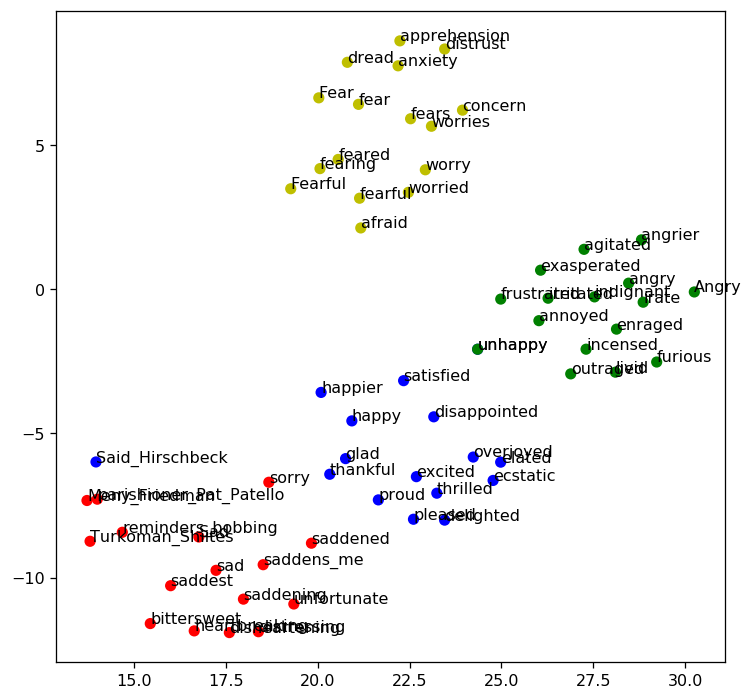

In [65]:
# Answer for exercise 8
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15

happy_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
angry_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words

print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


## 10. Elmo embeddings

Besides Word2Vec, several other pretrained models for generating embeddings exist. Here, we'll take a look at ElMo embeddings.
Elmo is a language model trained on a task to predict the next word in a sequence of words, but is bidirectional (unlike word2vec).

[Image](pic/pics8.png)

Source: (http://jalammar.github.io/illustrated-bert/)

To embed the sentences, we need to tokenize them and get them into a tensor of uniform shape.This means every sentence should have the same amount of tokens  (ie. If we have 5 sentences, we should have an array of 5 * x ). We will achieve this through padding, or adding "" at the end of each sentence for each missing token up to x.

We'll be using the Keras tokenizer to tokenize and pad. Keras tokenizer will first map each word to a number, and we'll get the tokenizing below in the text_tok_keras column.

In [ ]:
from keras.preprocessing.text import Tokenizer

#Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~')
tokenizer_keras.fit_on_texts(train_df['text'])
train_df['text_tok_keras'] = tokenizer_keras.texts_to_sequences(train_df['text'])
train_df.head()

In [ ]:
#check the lenght of the tokenized sentences
list(map(lambda x: len(x), train_df['text_tok_keras'].iloc[:5]))

As we discudded, the lenght of the tokenized sentences is not the same, so we pad.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

#pad sequences
maxlen = 30 # arbitrary
padded_tokens = pad_sequences(train_df['text_tok_keras'],  maxlen=maxlen, padding="post")
train_df['text_tok_keras'] = list(padded_tokens)
train_df.head()

Now we map back to words to obtain the padded tokenized representations in the text_tok_keras_words column.

In [ ]:
#map back to words
reverse_word_map = dict(map(reversed, tokenizer_keras.word_index.items()))
train_df['text_tok_keras_words'] = train_df['text_tok_keras'].apply(lambda x_list: [reverse_word_map[x] if x>0 else "" for x in x_list])
train_df.head()

Now, we use the Tensorflow Hub to charge a pretrained Elmo model. TensorFlow Hub is a library for reusable machine learning models. You can learn more here:
Source: (https://www.tensorflow.org/hub)
Make sure tensor has appropriate size!


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

#load elmo
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable = True)

#generic way to generate an array of the same length
token_len = np.empty(len(train_df))
token_len.fill(maxlen)

#create embeddings
embeddings = elmo(inputs={"tokens": list(train_df['text_tok_keras_words']),
                          "sequence_len": token_len},
                  signature="tokens",
                  as_dict=True)["elmo"]


In [ ]:
#check the Embedding layer dimension
embeddings.shape

To embed a word, you need to pass the position of the token. Let's take the first sentence:

In [ ]:
train_df['text'].iloc[0]

In [ ]:
# this might take a long time, make sure you can run Tf on your computer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("SusannahSpot")
print(sess.run(embeddings[0][1]))

print("I")
print(sess.run(embeddings[0][1]))

print("could")
print(sess.run(embeddings[0][2]))

print("pop")
print(sess.run(embeddings[0][3]))

print("round")
print(sess.run(embeddings[0][4]))

## Third Part(Kaggle competition report)

---

# I run all my code on Kaggle notebook since I do not have GPU on my laptop. Therefore there will be no outputs of each cells in my report,I'll eliberate the result and explain what I have done using part of my code.

### Contents
- Data preparation
- Feature engineering
- models that I've tried
- which has the best result

### Data preparation

In [ ]:
import re
import math
import pandas as pd
import numpy as np
import json
from nltk.corpus import stopwords
import nltk

In [ ]:
emotion = pd.read_csv('emotion.csv')
emotion.set_index('tweet_id')

identification = pd.read_csv('data_identification.csv')
identification.set_index('tweet_id')

identification_with_emotion = pd.merge(identification, emotion, on="tweet_id", how="outer", left_index=True)
identification_with_emotion.set_index('tweet_id')

In [ ]:
raw_tweets = []

with open('tweets_DM.json') as f:
    for line in f:
        raw_tweets.append(json.loads(line))
        
temp_tweets = pd.io.json.json_normalize(raw_tweets)

In [ ]:
temp_tweets.columns = ['score', 'index', 'crawldate', 'type', 'hastags', 'tweet_id', 'text']
temp_tweets.set_index('tweet_id')
temp_tweets = temp_tweets.drop(['index', 'type'], 1)

# Merge temp_tweets with the emotion and training information
tweets = pd.merge(temp_tweets, identification_with_emotion, on="tweet_id", left_index=True)

### Data preprocessing(Data cleaning)

I found out that there is a function called TweetTokenizer in the nltk.tokenize package, so I use it directly to tokenize the tweets.Doing that I can easily remove the user mentioned and the unnecessary punctuations.

In [1]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [2]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tw = '@wan: Love yaaa all, see you soon!!!!!!'
tknzr.tokenize(tw)

[':', 'Love', 'yaaa', 'all', ',', 'see', 'you', 'soon', '!', '!', '!']

## Feature Engineering
- Bag of words
- TF-IDF

I tried two kinds of feature engineering method,bag of words and TF_IDF, in order to see which of the combination with the model I'll testes later wiil have a better accuracy.

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False)
tfidf = TfidfVectorizer(max_features=20000, stop_words='english',
                                     tokenizer=tknzr.tokenize)

# fitting
tfidf.fit(train_df['text'])

### Bag of words

In [ ]:
bow_vector = TfidfVectorizer(max_features=20000, min_df=1, stop_words='english', tokenizer=nltk.word_tokenize)

# learn training data vocab and create a document-term matrix
x_bow_traincv = bow_vector.fit_transform(x_train)

# Transform the testing data into a document-term matrix
x_bow_testcv = bow_vector.transform(x_test)

## Model
- Naive Bayes
- Logistic Regression
- LTSM

I took BOW and TF_IDF features to trained the with Naive Bayes and Logistic regrssion which will be four combination. Observing the the result, I can choose which features I should be used to apply on the LTSM model.

### Naive Bayes Classifier

In [ ]:
# TFIDF Model
tfidf_mnb = MultinomialNB()

# Train model
%time tfidf_mnb.fit(x_tfidf_traincv, y_train)

# Validate model accuracy
tfidf_prediction = tfidf_mnb.predict(x_tfidf_testcv)

print('Testing accuracy: ', metrics.accuracy_score(y_test, tfidf_prediction))

# BOW Model
bow_mnb = MultinomialNB()

# Train model
%time bow_mnb.fit(x_bow_traincv, y_train)

# Validate model accuracy
bow_prediction = bow_mnb.predict(x_bow_testcv)

print('Testing accuraccy: ', metrics.accuracy_score(y_test, bow_prediction))

In [ ]:
def prepare_submission(t_prediction, tweet_ids, name):
    dataframe = pd.DataFrame({ 'id': tweet_ids.tolist(), 'emotion': t_prediction.tolist() })
    dataframe.to_csv(name, index=None)

In [ ]:
prepare_submission(tfidf_mnb.predict(kaggle_x_tfidf_cv), test_tweets['tweet_id'], 'naive_with_tfidf.csv')
prepare_submission(bow_mnb.predict(kaggle_x_bow_cv), test_tweets['tweet_id'], 'naive_with_bow.csv')

#### Naive Bayes
- bag og word test acuuracy:0.42486
- TFIDF test accuracy:0.42486

### Logistic Regression

After doing some research on the logistic regression, I found out that it has a pretty good results comparing to other non-NN architecture which allow us not onlt to predict the data in a shorter time but also it does not require a really computer hardware.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=6,n_jobs=-1,max_iter=1000)
lr.fit(X_train,y_train)

In [ ]:
pred_result_lr = lr.predict(X_test)

In [ ]:
# save the result
test_df['emotion']=pred_result_lr
test_df.drop(columns=['hashtags','text'],inplace=True)
test_df.index.rename('id',inplace=True)
test_df.columns=['emotion']
test_df.to_csv('lr_tfidf.csv')

In [ ]:
lr.fit(x_bow_traincv, y_train)
log_reg_prediction = lr.predict(kaggle_x_bow_cv)
# Export
prepare_submission(log_reg_prediction, test_tweets['tweet_id'], 'lr_with_bow.csv')

#### Logistic Regression
- bag og word test acuuracy:0.42299
- TFIDF test accuracy:0.46098

We can see from the result above that the Logistic Regression perform better than Naive Bayes and using TF-IDF features perform better than Bag of words.

After these four attempts, I decided to use LTSM model with TF-IDF in order to get better performance.

### LSTM

#### Turn Words to sequence

In [ ]:
max_words = 20000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_df['text'])

In [ ]:
train_seq = tok.texts_to_sequences(train_df['text'])
test_seq = tok.texts_to_sequences(test_df['text'])

train_seq_mat = sequence.pad_sequences(train_seq,maxlen=max_len)
test_seq_mat = sequence.pad_sequences(test_seq,maxlen=max_len)

#### One hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)


#### Bulid the model

In [ ]:
inputs = Input(name='inputs',shape=[max_len])
## Embedding
layer = Embedding(max_words+1,128,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128,activation="relu",name="FC1")(layer)
layer = Dropout(0.5)(layer)
layer = Dense(output_shape,activation="softmax",name="FC2")(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=["accuracy"])

In [ ]:
model_fit = model.fit(train_seq_mat,y_train,batch_size=128,epochs=3,
                      callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)] )

In [ ]:
# predict the result using our model
pred_result_lstm = label_decode(label_encoder, model.predict(test_seq_mat, batch_size=128))
pred_result_lstm[:5]

In [ ]:
# save the result
test_df['emotion']=pred_result_lstm
test_df.drop(columns=['hashtags','text'],inplace=True)
test_df.index.rename('id',inplace=True)
test_df.columns=['emotion']
test_df.to_csv('LTSM_tfidf.csv')

LTSM with TF-IDF test accuracy:0.48577

## Conclusion(The best model I've choosed)

After five attempt of the model and the feature combination ,using LTSM with TF-IDF gave me the best result with 0.48577, it is not suprised to get the best accuracy using LTSM model which is an NN architecture, however during the process of the model development and the feature engineering, I have a better insight of the advantages of different feature and model which helps a lot with our final projects.